In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import seaborn as sns

# 中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('./data/bilibili_rank.csv', encoding='utf-8')
df.head()

,视频标题,发布时间,时长,up主,up主mid,播放量,弹幕数,评论数,收藏量,投币量,转发数,历史排名,点赞数,分辨率,发布地点,BV号
0,上海有些出租车挑客拒载？吃相实属难看！作为自己的家乡真希望此类有损城市名片的事情越来越少！也...,1719654599,318,superB太,85754245,4191097,12772,20984,32239,152681,10773,1,564788,1080x1920,江苏,BV1jJ4m1u7r5
1,挑战一次花光¥100000块，能否买空便利店，所有的零食？,1719567812,450,Meetfood觅食,447317111,7507209,14406,4752,101038,418167,6123,1,425129,3840x2160,陕西,BV11i421a7wD
2,火柴人 VS 几何（Geometry）,1719664395,557,火柴人AlanBecker,519253600,2060101,19601,5211,119746,163549,30418,3,249942,1920x1080,北京,BV1hs421T7g8
3,王妈《大结局篇》！大家想看番外吗？,1719652878,661,七颗猩猩QKXX,1659651634,1762805,11178,23636,27502,49073,11388,4,254590,1080x1920,湖北,BV1YZ421M74y
4,《绝区零》艾莲角色PV | 拜托了，艾莲大人！,1719720006,745,绝区零,1636034895,2741688,8100,9372,63333,169490,36318,5,247489,1920x1080,上海,BV1MH4y1w7pT


# 热门视频地区分布

In [3]:
from pyecharts.charts import Map
from pyecharts import options as opts

province_mapping = {
    "北京": "北京市",
    "天津": "天津市",
    "河北": "河北省",
    "山西": "山西省",
    "内蒙古": "内蒙古自治区",
    "辽宁": "辽宁省",
    "吉林": "吉林省",
    "黑龙江": "黑龙江省",
    "上海": "上海市",
    "江苏": "江苏省",
    "浙江": "浙江省",
    "安徽": "安徽省",
    "福建": "福建省",
    "江西": "江西省",
    "山东": "山东省",
    "河南": "河南省",
    "湖北": "湖北省",
    "湖南": "湖南省",
    "广东": "广东省",
    "广西": "广西壮族自治区",
    "海南": "海南省",
    "重庆": "重庆市",
    "四川": "四川省",
    "贵州": "贵州省",
    "云南": "云南省",
    "西藏": "西藏自治区",
    "陕西": "陕西省",
    "甘肃": "甘肃省",
    "青海": "青海省",
    "宁夏": "宁夏回族自治区",
    "新疆": "新疆维吾尔自治区",
    "香港": "香港特别行政区",
    "澳门": "澳门特别行政区",
    "台湾": "台湾省"
}

province_distribution = df['发布地点'].map(province_mapping).value_counts()
provinces = province_distribution.index
values = province_distribution.values.astype(float)  # 必须是浮点数才能绘制热力图

data = list(zip(provinces, values))
data

[('广东省', 13.0),
 ('北京市', 11.0),
 ('浙江省', 11.0),
 ('上海市', 10.0),
 ('河北省', 5.0),
 ('山东省', 5.0),
 ('河南省', 5.0),
 ('江苏省', 4.0),
 ('陕西省', 4.0),
 ('湖北省', 4.0),
 ('湖南省', 3.0),
 ('重庆市', 3.0),
 ('四川省', 3.0),
 ('江西省', 2.0),
 ('黑龙江省', 2.0),
 ('云南省', 2.0),
 ('吉林省', 1.0),
 ('广西壮族自治区', 1.0),
 ('内蒙古自治区', 1.0),
 ('贵州省', 1.0),
 ('安徽省', 1.0),
 ('辽宁省', 1.0),
 ('福建省', 1.0),
 ('天津市', 1.0),
 ('山西省', 1.0)]

In [4]:
province_map = (
    Map(opts.InitOpts(width="1200px", height="800px"))
    .add(series_name="发布数量", data_pair=data, maptype="china", is_map_symbol_show=False)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="B站热门视频发布地点分布", subtitle="数据来源：哔哩哔哩排行榜"),
        visualmap_opts=opts.VisualMapOpts(max_=values.max(), is_piecewise=False),
    )
)

province_map.render('./geo_heatmap/bilibili_map.html')
province_map.render_notebook()

# 线性回归

In [5]:
view_df = df.copy()
view_df['播放量'] = view_df['播放量'] / 10000

In [6]:
def seconds_to_hms(seconds):
    """
    将秒数转换为时分秒格式
    """
    seconds = int(seconds)
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60
    if hours == 0:
        return f"{minutes:02d}:{seconds:02d}"
    else:
        return f"{hours:02d}:{minutes:02d}:{seconds:02d}"

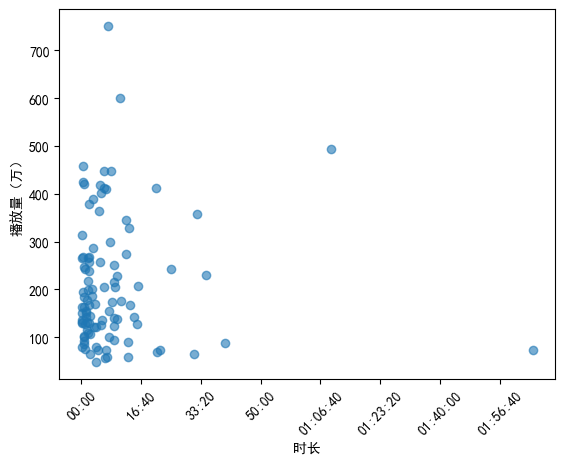

In [7]:
# 播放量和视频时长的关系
plt.scatter(view_df['时长'], view_df['播放量'], alpha=0.6)
plt.xlabel('时长')
plt.ylabel('播放量（万）')

# 使用FuncFormatter应用时分秒格式
formatter = FuncFormatter(lambda x, _: seconds_to_hms(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)  # 旋转x轴标签，以便更容易阅读
plt.show()

In [8]:
# 剔除时长最高的前n个异常值
largest_num = 2
view_df = view_df[view_df['时长'] < view_df['时长'].nlargest(largest_num).min()]

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = view_df['时长'].values.reshape(-1, 1)
y = view_df['播放量'].values

view_model = LinearRegression()
view_model.fit(X, y)

LinearRegression()

In [10]:
from IPython.display import Latex
Latex(f"$y={view_model.coef_[0]:.3f}x{view_model.intercept_:+.3f}$")

<IPython.core.display.Latex object>

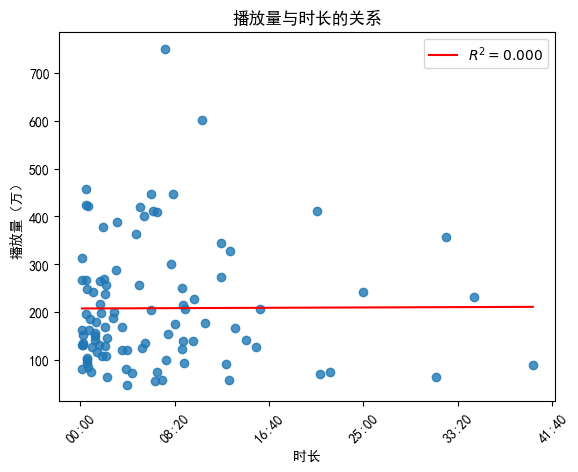

In [11]:
X_pred = np.array([[X.min()], [X.max()]])
y_pred = view_model.predict(X_pred)

r_squared = r2_score(y, view_model.predict(X))

plt.scatter(X, y, alpha=0.8)
plt.plot(X_pred, y_pred, color='red', label=f'$R^2={r_squared:.3f}$')
plt.legend()
plt.xlabel('时长')
plt.ylabel('播放量（万）')
plt.title('播放量与时长的关系')

# 使用FuncFormatter应用时分秒格式
formatter = FuncFormatter(lambda x, _: seconds_to_hms(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)  # 旋转x轴标签，以便更容易阅读
plt.show()

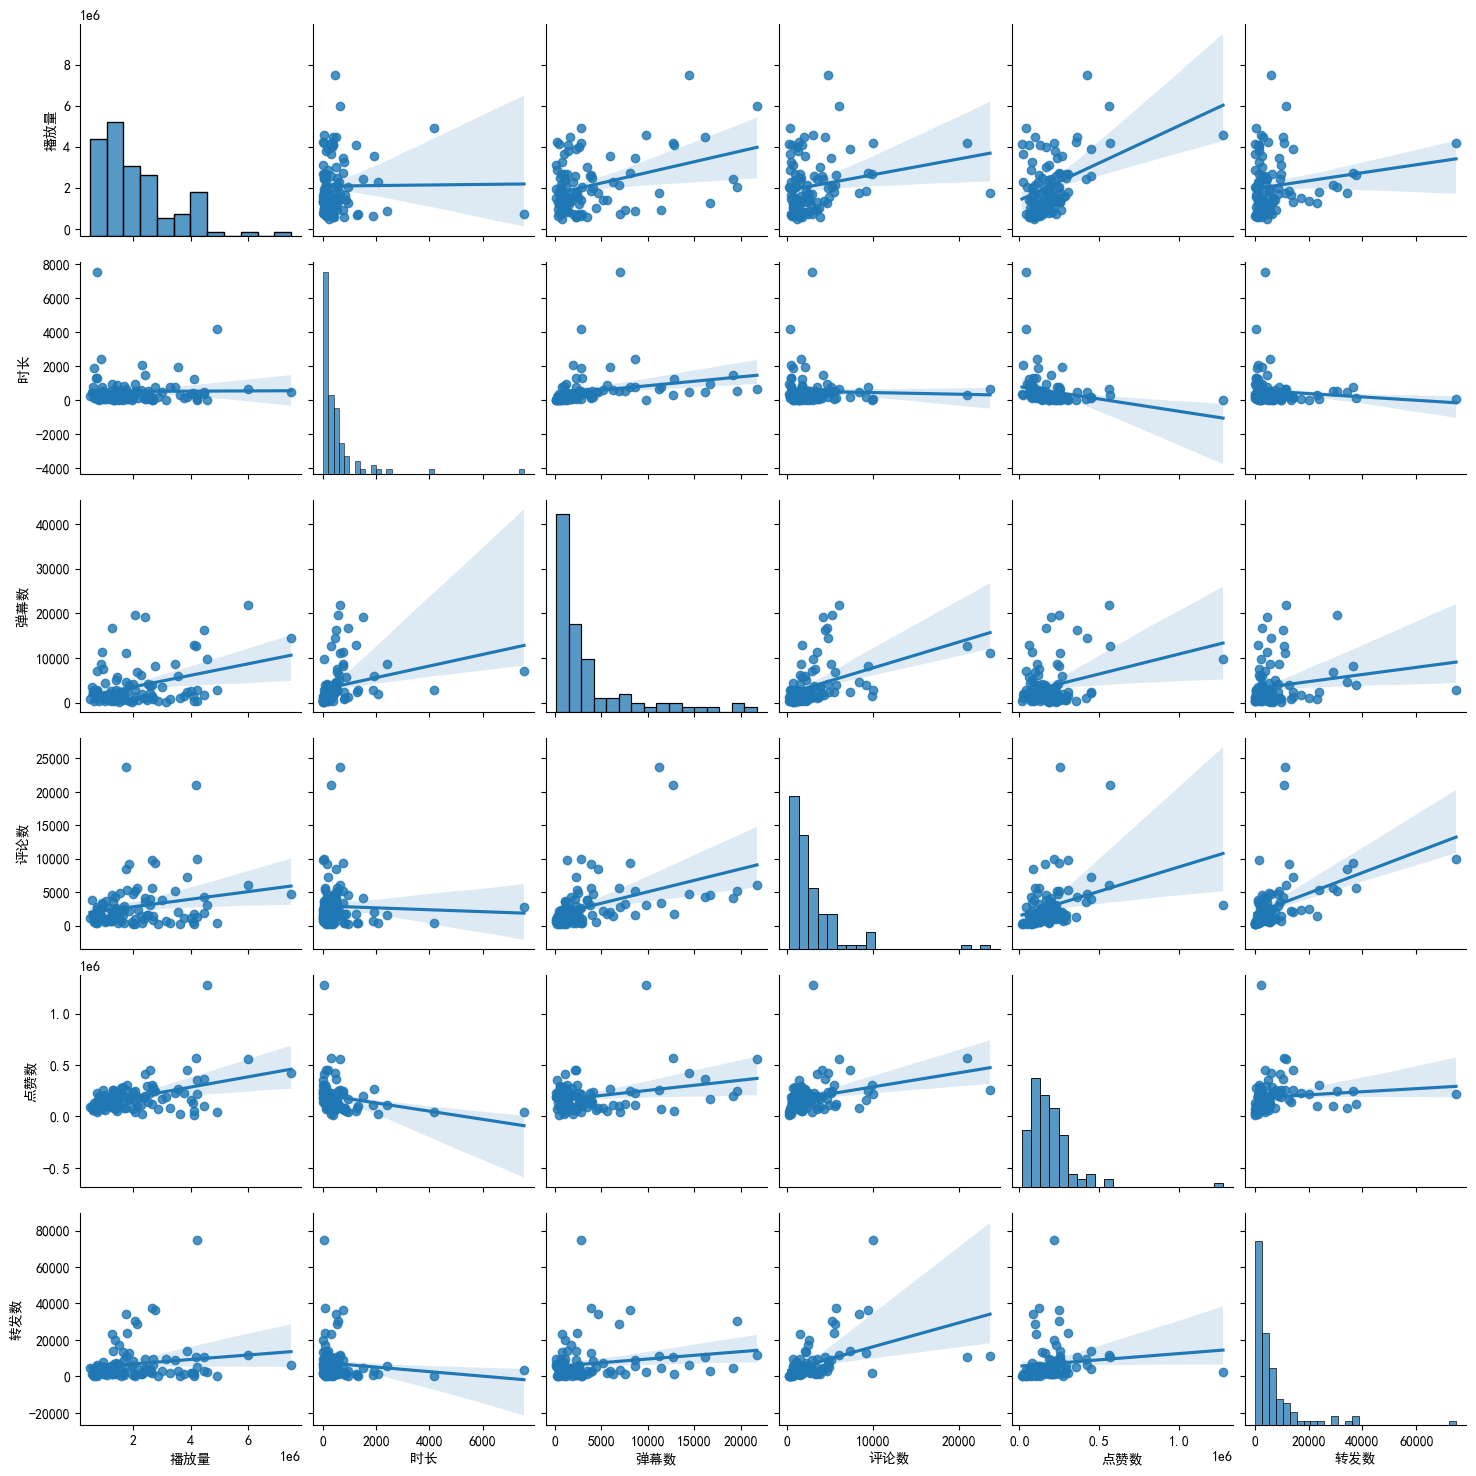

In [12]:
reg_df = df[['播放量', '时长', '弹幕数', '评论数', '点赞数', '转发数']]

sns.pairplot(reg_df, kind='reg')

# 发布时间

In [13]:
# timestamp转换为datetime
timestamp = 1719654599
pd.to_datetime(timestamp, unit='s')

Timestamp('2024-06-29 09:49:59')

In [14]:
# 将发布时间转换为datetime
pubtime_df = df.copy()
pubtime_df['发布时间'] = pd.to_datetime(pubtime_df['发布时间'], unit='s')
pubtime_df

,视频标题,发布时间,时长,up主,up主mid,播放量,弹幕数,评论数,收藏量,投币量,转发数,历史排名,点赞数,分辨率,发布地点,BV号
0,上海有些出租车挑客拒载？吃相实属难看！作为自己的家乡真希望此类有损城市名片的事情越来越少！也...,2024-06-29 09:49:59,318,superB太,85754245,4191097,12772,20984,32239,152681,10773,1,564788,1080x1920,江苏,BV1jJ4m1u7r5
1,挑战一次花光¥100000块，能否买空便利店，所有的零食？,2024-06-28 09:43:32,450,Meetfood觅食,447317111,7507209,14406,4752,101038,418167,6123,1,425129,3840x2160,陕西,BV11i421a7wD
2,火柴人 VS 几何（Geometry）,2024-06-29 12:33:15,557,火柴人AlanBecker,519253600,2060101,19601,5211,119746,163549,30418,3,249942,1920x1080,北京,BV1hs421T7g8
3,王妈《大结局篇》！大家想看番外吗？,2024-06-29 09:21:18,661,七颗猩猩QKXX,1659651634,1762805,11178,23636,27502,49073,11388,4,254590,1080x1920,湖北,BV1YZ421M74y
4,《绝区零》艾莲角色PV | 拜托了，艾莲大人！,2024-06-30 04:00:06,745,绝区零,1636034895,2741688,8100,9372,63333,169490,36318,5,247489,1920x1080,上海,BV1MH4y1w7pT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,上班把怨气都扎出去了，下班回来就乖啦,2024-06-27 11:22:28,10,小文颖灬,443090051,801975,446,1717,24396,6963,2349,68,182894,1080x1440,广东,BV1jS421d7Ci
96,餐饮界的胖东来？暖心的服务，满满的细节！最后竟然给我吃哭了QAQ,2024-06-28 10:00:00,786,大祥哥来了,2920960,579433,2318,1750,9891,64327,2540,96,61949,1920x1080,北京,BV1Sx4y1b76U
97,当你和兄弟们来到诡异公司却「轮椅竞速」!!？非生物因素 第一期！,2024-06-29 00:00:00,1269,马里奥红叔,680447,698827,2346,405,12608,17516,547,98,83445,1920x1080,上海,BV1Tx4y1t7wy
98,【Faouzia凡希亚】中文歌首秀！亚亚演绎邓紫棋热单《来自天堂的魔鬼》,2024-06-28 15:42:05,90,Faouzia凡希亚,628474872,1161713,1132,2713,10344,20887,4930,99,134501,1920x1080,湖南,BV1As421M7m8


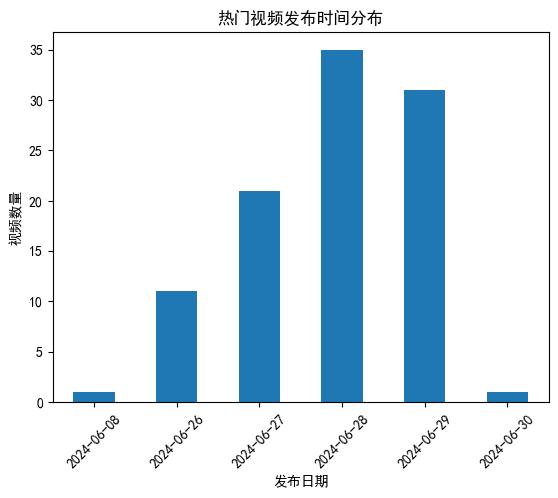

In [15]:
# 查看发布时间的分布
pubtime_df['发布时间'].dt.date.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('发布日期')
plt.ylabel('视频数量')
plt.title('热门视频发布时间分布')
plt.show()

In [16]:
# 找出发布时间最早的视频
pubtime_df.loc[pubtime_df['发布时间'].idxmin()]

视频标题              “昔人已乘黄鹤去……”
发布时间      2024-06-08 00:37:24
时长                         34
up主                     延玺讲历史
up主mid             1327039787
播放量                   4574782
弹幕数                      9834
评论数                      3041
收藏量                    182642
投币量                    668005
转发数                      2182
历史排名                       64
点赞数                   1276692
分辨率                 1920x1080
发布地点                       山西
BV号              BV1wm421L7WL
Name: 85, dtype: object

In [17]:
# 规定当前时间为2024年7月1日00:00:00
current_time = pd.Timestamp('2024-07-01 00:00:00')

# 计算视频发布时间距离当前时间的小时数
time_diff = current_time - pubtime_df['发布时间']

In [18]:
hours_diff = time_diff.dt.total_seconds() / 3600
hours_diff.describe()

count    100.000000
mean      70.416167
std       53.773188
min       19.998333
25%       44.437500
50%       62.583611
75%       84.807500
max      551.376667
Name: 发布时间, dtype: float64

## 推荐指数
视频的推荐指数=硬币×0.4+收藏×0.3+弹幕×0.4+评论×0.4+播放×0.25+点赞×0.4+分享×0.6

一天内的新发布视频推荐指数提高1.5倍

In [19]:
recommend_df = df[['视频标题', 'up主', '发布时间', '播放量', '投币量', '收藏量', '弹幕数', '评论数', '点赞数', '转发数']].copy()
recommend_df['推荐指数'] = df['投币量'] * 0.4 + \
                         df['收藏量'] * 0.3  + \
                         df['弹幕数'] * 0.4  + \
                         df['评论数'] * 0.4  + \
                         df['播放量'] * 0.25 + \
                         df['点赞数'] * 0.4  + \
                         df['转发数'] * 0.6
recommend_df.head()

,视频标题,up主,发布时间,播放量,投币量,收藏量,弹幕数,评论数,点赞数,转发数,推荐指数
0,上海有些出租车挑客拒载？吃相实属难看！作为自己的家乡真希望此类有损城市名片的事情越来越少！也...,superB太,1719654599,4191097,152681,32239,12772,20984,564788,10773,1364399.75
1,挑战一次花光¥100000块，能否买空便利店，所有的零食？,Meetfood觅食,1719567812,7507209,418167,101038,14406,4752,425129,6123,2255769.05
2,火柴人 VS 几何（Geometry）,火柴人AlanBecker,1719664395,2060101,163549,119746,19601,5211,249942,30418,744521.05
3,王妈《大结局篇》！大家想看番外吗？,七颗猩猩QKXX,1719652878,1762805,49073,27502,11178,23636,254590,11388,591175.45
4,《绝区零》艾莲角色PV | 拜托了，艾莲大人！,绝区零,1719720006,2741688,169490,63333,8100,9372,247489,36318,899993.10


In [20]:
recommend_df['推荐指数（不含播放量）'] = df['投币量'] * 0.4 + \
                         df['收藏量'] * 0.3  + \
                         df['弹幕数'] * 0.4  + \
                         df['评论数'] * 0.4  + \
                         df['点赞数'] * 0.4  + \
                         df['转发数'] * 0.6

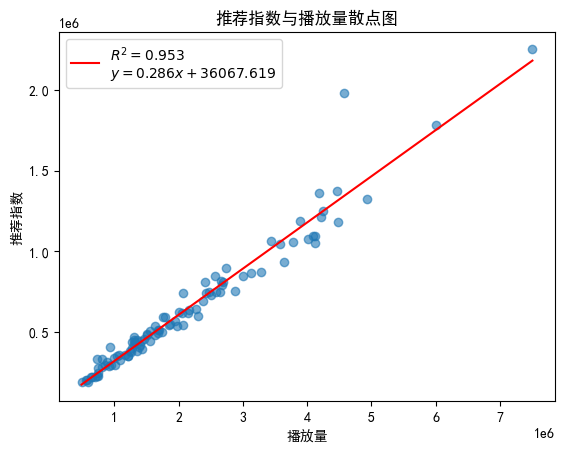

In [21]:
X = recommend_df['播放量'].values.reshape(-1, 1)
y = recommend_df['推荐指数'].values

plt.scatter(recommend_df['播放量'], recommend_df['推荐指数'], alpha=0.6)

recommend_model = LinearRegression()
recommend_model.fit(X, y)

X_pred = np.array([[X.min()], [X.max()]])
y_pred = recommend_model.predict(X_pred)

r_squared = r2_score(y, recommend_model.predict(X))

plt.plot(X_pred, y_pred, color='red', label=f'$R^2={r_squared:.3f}$\n$y={recommend_model.coef_[0]:.3f}x{recommend_model.intercept_:+.3f}$')
plt.legend()
plt.xlabel('播放量')
plt.ylabel('推荐指数')
plt.title('推荐指数与播放量散点图')
plt.show()

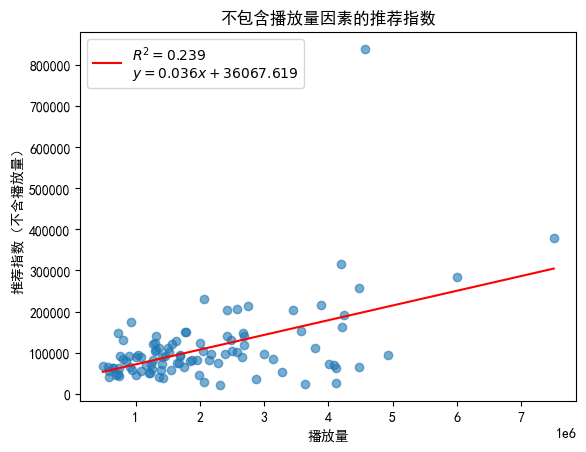

In [22]:
X = recommend_df['播放量'].values.reshape(-1, 1)
y = recommend_df['推荐指数（不含播放量）'].values

plt.scatter(recommend_df['播放量'], recommend_df['推荐指数（不含播放量）'], alpha=0.6)

recommend_model = LinearRegression()
recommend_model.fit(X, y)

X_pred = np.array([[X.min()], [X.max()]])
y_pred = recommend_model.predict(X_pred)

r_squared = r2_score(y, recommend_model.predict(X))

plt.plot(X_pred, y_pred, color='red', label=f'$R^2={r_squared:.3f}$\n$y={recommend_model.coef_[0]:.3f}x{recommend_model.intercept_:+.3f}$')
plt.legend()
plt.xlabel('播放量')
plt.ylabel('推荐指数（不含播放量）')
plt.title('不包含播放量因素的推荐指数')
plt.show()

# 分辨率

In [23]:
resolution_df = df[['分辨率', '播放量', '时长']].copy()
resolution_df['分辨率'].unique()

array(['1080x1920', '3840x2160', '1920x1080', '2560x1440', '1440x2560',
       '1080x1904', '2160x3840', '1760x1200', '1920x1078', '4320x7680',
       '1414x1080', '2560x1080', '1440x1080', '720x1280', '888x1566',
       '1080x1440'], dtype=object)

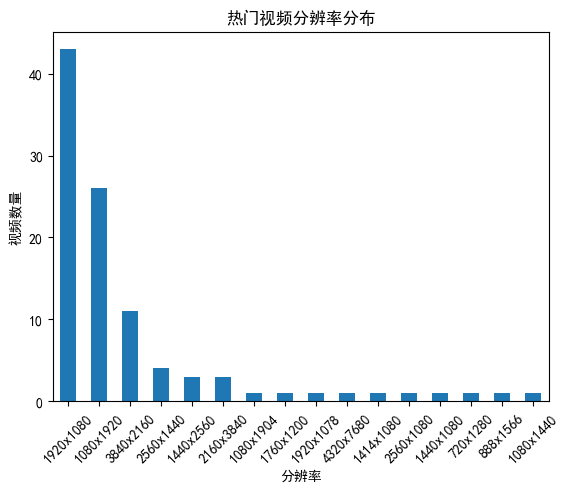

In [24]:
resolution_df['分辨率'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('分辨率')
plt.ylabel('视频数量')
plt.title('热门视频分辨率分布')
plt.show()

In [25]:
# 判断是横屏还是竖屏
def screen_orientation(resolution):
    width, height = map(int, resolution.split('x'))
    return '横屏' if width > height else '竖屏'

resolution_df['屏幕方向'] = resolution_df['分辨率'].apply(screen_orientation)
resolution_df.head()

,分辨率,播放量,时长,屏幕方向
0,1080x1920,4191097,318,竖屏
1,3840x2160,7507209,450,横屏
2,1920x1080,2060101,557,横屏
3,1080x1920,1762805,661,竖屏
4,1920x1080,2741688,745,横屏


In [26]:
# axb和bxa的分辨率视为相同，较大的值在前
def normalize_resolution(resolution):
    width, height = map(int, resolution.split('x'))
    return 'x'.join(map(str, sorted([width, height], reverse=True)))

resolution_df['分辨率'] = resolution_df['分辨率'].apply(normalize_resolution)
resolution_df.head()

,分辨率,播放量,时长,屏幕方向
0,1920x1080,4191097,318,竖屏
1,3840x2160,7507209,450,横屏
2,1920x1080,2060101,557,横屏
3,1920x1080,1762805,661,竖屏
4,1920x1080,2741688,745,横屏


In [27]:
resolution_df['分辨率'] = resolution_df['分辨率'].apply(normalize_resolution)
resolution_df['播放量'] = resolution_df['播放量'] / 10000

# 按照分辨率和屏幕方向分组，计算播放量总和
resolution_group = resolution_df.groupby(['分辨率', '屏幕方向'])['播放量'].sum()
resolution_bar = resolution_group.unstack()
resolution_bar

屏幕方向,横屏,竖屏
分辨率,,
1280x720,NaN,151.2392
1414x1080,206.5728,NaN
1440x1080,85.3288,80.1975
1566x888,NaN,163.5010
1760x1200,257.4165,NaN
1904x1080,NaN,178.4282
1920x1078,123.4457,NaN
1920x1080,9312.1501,5401.5196
2560x1080,198.0679,NaN


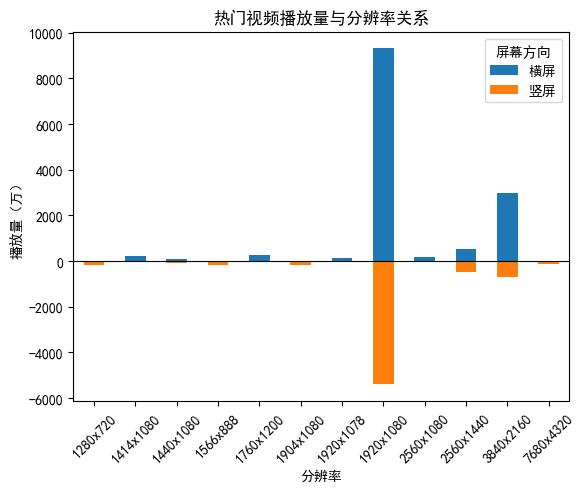

In [28]:
# 绘制对称堆叠柱状图
resolution_bar['竖屏'] = -resolution_bar['竖屏'].abs()  # 将竖屏的值取负数，使得堆叠柱状图对称
resolution_bar.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.xlabel('分辨率')
plt.ylabel('播放量（万）')
plt.title('热门视频播放量与分辨率关系')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

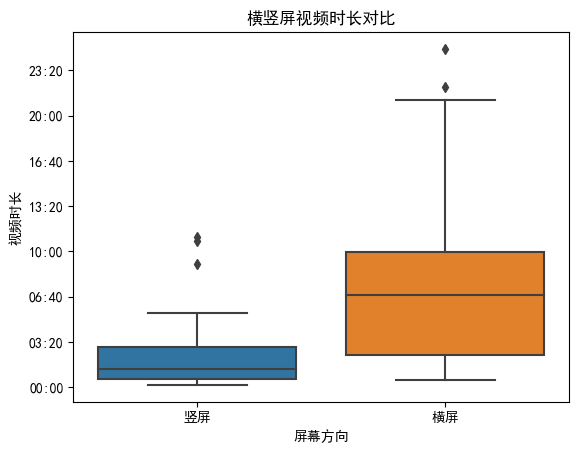

In [29]:
# 横竖屏的视频时长对比
# 剔除掉时长最高的前n个离群值
largest_num = 6
orientation_df = resolution_df[resolution_df['时长'] < resolution_df['时长'].nlargest(largest_num).min()]

# 条形图
# orientation_duration = orientation_df.groupby('屏幕方向')['时长'].mean()
# orientation_duration.plot(kind='bar')

# 箱线图，标出分位数
sns.boxplot(x='屏幕方向', y='时长', data=orientation_df)

# 纵坐标使用分秒格式
formatter = FuncFormatter(lambda x, _: seconds_to_hms(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=0)
plt.xlabel('屏幕方向')
plt.ylabel('视频时长')
plt.title('横竖屏视频时长对比')
plt.show()

# up主粉丝数

In [30]:
user_df = pd.read_csv('./data/bilibili_user.csv', encoding='utf-8')
user_df.set_index('UID', inplace=True)
user_df.head()

,昵称,性别,签名,等级,头衔,关注数,粉丝数
UID,,,,,,,
85754245,superB太,保密,唯一合作邮箱：superbtai@163.com\n微博：superB太\n嘴巴常年烂和干,6.0,bilibili 知名Vlog UP主,72.0,2052024.0
447317111,Meetfood觅食,男,海外美食测评，美食的背后是文化和故事 商务合作请联系vx：Ninomiya_T（添加...,6.0,2023百大UP主、知名美食UP主,221.0,4029339.0
519253600,火柴人AlanBecker,保密,Alan Becker官方频道,6.0,2023年度最佳作品、2021百大UP主、Alan Becker官方帐号,9.0,3714991.0
1659651634,七颗猩猩QKXX,保密,承蒙厚爱，多谢关注！合作：Wangzhixin928邮箱：qikexingxing@qq.com,6.0,七颗猩猩官方账号，搞笑视频UP主,27.0,2722807.0
1636034895,绝区零,保密,绝区零官方账号,6.0,绝区零官方账号,7.0,6291516.0


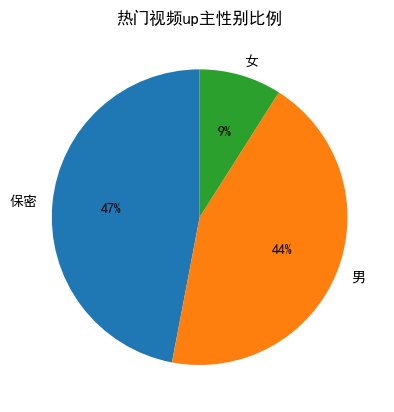

In [31]:
# 性别比例饼状图
user_df['性别'].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=90)
plt.gca().axes.get_yaxis().set_visible(False)
plt.title('热门视频up主性别比例')
plt.show()

In [32]:
# 播放量和粉丝数的关系
follower_df = df[['up主mid', '播放量']].copy()
follower_df['粉丝数'] = follower_df['up主mid'].map(user_df['粉丝数'])
follower_df.head()

,up主mid,播放量,粉丝数
0,85754245,4191097,2052024.0
1,447317111,7507209,4029339.0
2,519253600,2060101,3714991.0
3,1659651634,1762805,2722807.0
4,1636034895,2741688,6291516.0


In [33]:
follower_df['播放量'] = follower_df['播放量'] / 10000
follower_df['粉丝数'] = follower_df['粉丝数'] / 10000

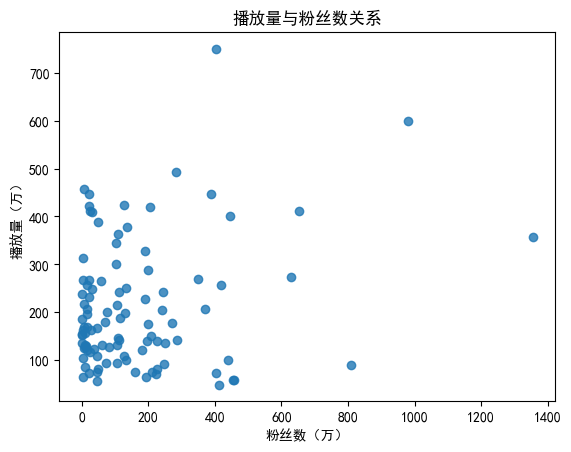

In [34]:
plt.scatter(follower_df['粉丝数'], follower_df['播放量'], alpha=0.8)
plt.xlabel('粉丝数（万）')
plt.ylabel('播放量（万）')
plt.title('播放量与粉丝数关系')
plt.show()

# 词云

In [35]:
import jieba
from wordcloud import WordCloud

# 视频标题词云
title_text = ' '.join(df['视频标题'])
title_text = ' '.join(jieba.cut(title_text))
title_text[:100]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yx\AppData\Local\Temp\jieba.cache
Loading model cost 0.601 seconds.
Prefix dict has been built successfully.


'上海 有些 出租车 挑客 拒载 ？ 吃 相 实属 难看 ！ 作为 自己 的 家乡 真 希望 此类 有损 城市 名片 的 事情 越来越少 ！ 也 希望 能 有 越来越 多 优秀 本分 的 司机 出现 ，'

In [36]:
with open("./wordcloud/chinese_stopword.txt", mode="r+", encoding="GBK") as f:
    stop_word_list = f.read().split("\n")

print(stop_word_list)

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '?', '_', '“', '”', '、', '。', '《', '》', '一', '一些', '一何', '一切', '一则', '一方面', '一旦', '一来', '一样', '一般', '一转眼', '万一', '上', '上下', '下', '不', '不仅', '不但', '不光', '不单', '不只', '不外乎', '不如', '不妨', '不尽', '不尽然', '不得', '不怕', '不惟', '不成', '不拘', '不料', '不是', '不比', '不然', '不特', '不独', '不管', '不至于', '不若', '不论', '不过', '不问', '与', '与其', '与其说', '与否', '与此同时', '且', '且不说', '且说', '两者', '个', '个别', '临', '为', '为了', '为什么', '为何', '为止', '为此', '为着', '乃', '乃至', '乃至于', '么', '之', '之一', '之所以', '之类', '乌乎', '乎', '乘', '也', '也好', '也罢', '了', '二来', '于', '于是', '于是乎', '云云', '云尔', '些', '亦', '人', '人们', '人家', '什么', '什么样', '今', '介于', '仍', '仍旧', '从', '从此', '从而', '他', '他人', '他们', '以', '以上', '以为', '以便', '以免', '以及', '以故', '以期', '以来', '以至', '以至于', '以致', '们', '任', '任何', '任凭', '似的', '但', '但凡', '但是', '何', '何以', '何况', '何处', '何时', '余外', '作为', '你', '你们', '使', '使得', '例如', '依', '依据', '依照', '便于', '俺', '俺们', '倘', '倘使', '倘或', '倘然', '倘若', '借', '假使', '假如', '假若', '傥然', '像', '儿', '先不先', '光是', '全体', '全部', '

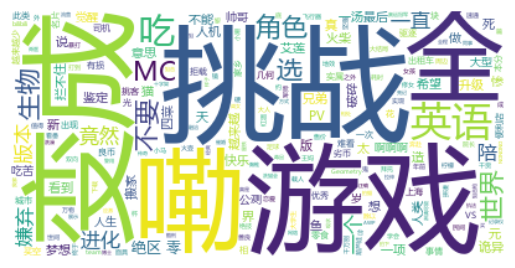

In [37]:
wordcloud = WordCloud(
    background_color='white',
    font_path='./wordcloud/msyh.ttc',  # 对中文操作必须指明字体
    max_font_size=100,
    stopwords=stop_word_list
).generate(title_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

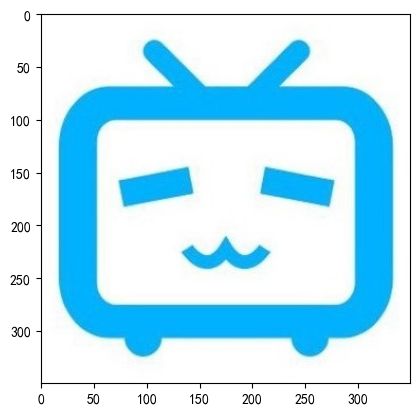

In [38]:
color_mask = plt.imread('./wordcloud/bilibili_TV.jpg')
plt.imshow(color_mask)

In [39]:
color_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

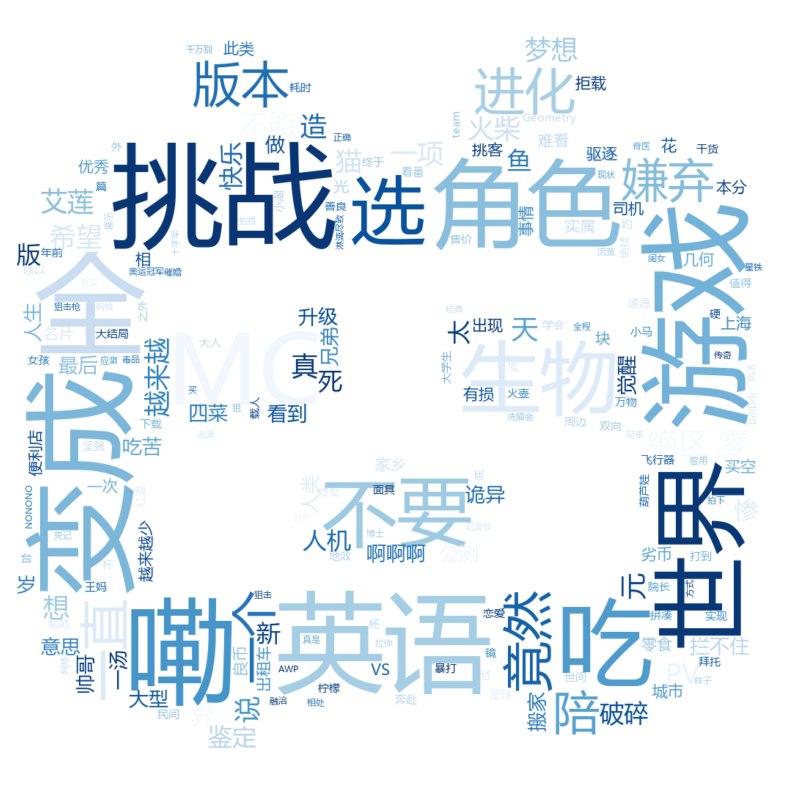

In [40]:
# 让词云偏蓝色
cloud = WordCloud(
    background_color='white',
    font_path='./wordcloud/msyh.ttc',  # 对中文操作必须指明字体
    mask=color_mask,
    max_font_size=150,
    scale=3,
    colormap='Blues',
    stopwords=stop_word_list
).generate(title_text)

plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('./wordcloud/bilibili_wordcloud.png')
plt.show()